In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import cv2


In [2]:


def resize_and_center(crop):
    h, w = crop.shape
    max_side = max(h, w)

    square = np.zeros((max_side, max_side), dtype=np.uint8)
    y_offset = (max_side - h) // 2
    x_offset = (max_side - w) // 2
    square[y_offset:y_offset+h, x_offset:x_offset+w] = crop

    resized = cv2.resize(square, (20, 20), interpolation=cv2.INTER_AREA)

    canvas = np.zeros((28, 28), dtype=np.uint8)
    y_start = (28 - 20) // 2
    x_start = (28 - 20) // 2
    canvas[y_start:y_start+20, x_start:x_start+20] = resized

    normalized=canvas/255.0

    return normalized


In [3]:
dataset_mnist_28=fetch_openml("mnist_784")

X=dataset_mnist_28.data
y=dataset_mnist_28.target


encoder = LabelEncoder()
y = encoder.fit_transform(y)

model = LogisticRegression(max_iter=1000)
X = X/255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [4]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Report:               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.93      0.93      1295
           5       0.88      0.88      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.90      0.87      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



<Axes: >

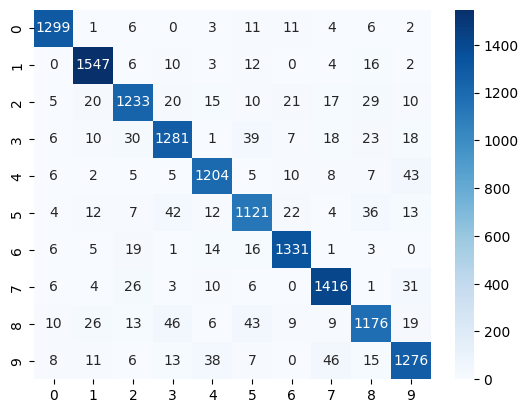

In [5]:
print("Report:", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), fmt="d", annot=True, cmap="Blues")

In [6]:
img=cv2.imread("final.png")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [7]:
contours, hierarchy = cv2.findContours(gray,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
for cnt in contours:
    cv2.drawContours(img, [cnt], -1,(0,0,170), 2)
    x,y,w,h=cv2.boundingRect(cnt)

    crop = gray[y-15:y+h+15,x-15:x+w+15]
    cv2.rectangle(img , (x-10,y-10),(x+w+10, y+h+10), (170, 255, 170),2)
    

    sample = resize_and_center(crop)
    sample_flat = sample.flatten().reshape(1,-1) 
    result=model.predict(sample_flat)

    cv2.imshow("Img", img)
    cv2.imshow("Sample", sample)
    cv2.imshow("crop", crop)
    cv2.putText(img ,f"Num {result}", (x+20,y-30), cv2.FONT_HERSHEY_SIMPLEX, .7 ,(255,255,255),2)
    cv2.waitKey(0)

cv2.imshow("Img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation